<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Кодирование-и-масштабирование" data-toc-modified-id="Кодирование-и-масштабирование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Кодирование и масштабирование</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель исследования**:
Построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

**Ход исследования**

Исследование пройдёт в 4 этапa:

- Подготовка данных
- Исследование задачи
- Борьба с дисбалансом
- Тестирование модели

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

In [2]:
users = pd.read_csv('/datasets/Churn.csv')

In [3]:
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Описание данных**

Итак, в таблице 14 колонок.Признаки имеют типы int64, object и float64.

**Признаки**

- *RowNumber —* индекс строки в данных
- *CustomerId* — уникальный идентификатор клиента
- *Surname —* фамилия
- *CreditScore —* кредитный рейтинг
- *Geography —* страна проживания
- *Gender —* пол
- *Age —* возраст
- *Tenure —* сколько лет человек является клиентом банка
- *Balance —* баланс на счёте
- *NumOfProducts —* количество продуктов банка, используемых клиентом
- *HasCrCard —* наличие кредитной карты
- *IsActiveMember —* активность клиента
- *EstimatedSalary —* предполагаемая зарплата

**Целевой признак**

- *Exited* — факт ухода клиента

### Пропуски

В данных присутствуют пропуски,кроме того:
- заголовки столбцов необходимо привести к нижнему регистру;
- *RowNumber* дублирует индексы;
- *CustomerId* и *Surname* не влияют на отток клиентов. Эти столбцы следует удалить.

In [5]:
users = users.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
users.columns = users.columns.str.lower()
users = users.rename(columns={'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'})

In [7]:
users['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [8]:
users[(users['tenure'].isna()) & (users['estimated_salary']< 100000)]

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
...,...,...,...,...,...,...,...,...,...,...,...
9925,694,France,Female,38,NaN,195926.39,1,1,1,85522.84,0
9931,850,France,Female,34,NaN,101266.51,1,1,0,33501.98,0
9938,526,Spain,Female,36,NaN,91132.18,1,0,0,58111.71,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


<AxesSubplot:>

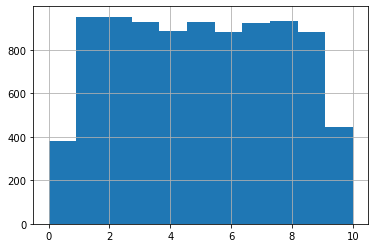

In [9]:
users['tenure'].hist(bins=11)

Данные в колонке `tenure` пропущены вероятно при некорректной выгрузке данных. 
Заменим пропуски на медианное значение, тогда распределение значений будет близко к нормальному.

In [10]:
m = users['tenure'].median()

In [11]:
users['tenure'] = users['tenure'].fillna(m)

In [12]:
users.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В признаках `balance` и `estimated_salary` можно отметить большой разброс значений. В данных 25% клиентов с нулевым балансом, чья предполагаемая зарплата ниже 51 000. Так же есть четверть всех клиентов были возрастом от 44 до 92 лет.

In [13]:
users.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [14]:
users.duplicated().sum()

0

### Кодирование и масштабирование

Преобразуем категориальные признаки в численные методом *ОНЕ*:

In [15]:
users_ohe = pd.get_dummies(users, drop_first=True)
users_ohe.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_Germany', 'geography_Spain', 'gender_Male'],
      dtype='object')

Чтобы получить тестовую выборку, разобъем данные в отношении 3:1:1.

In [16]:
target = users_ohe['exited']
features = users_ohe.drop(['exited'], axis=1)

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [18]:
features_valid.shape

(2000, 11)

In [19]:
features_test.shape

(2000, 11)

Разбиение произведено.
Масштабируем все численные признаки:

In [20]:
numeric = ['credit_score', 'balance', 'estimated_salary', 'num_of_products', 'age']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

C:\Users\Anton\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


**Вывод**

Итак, на данном этапе:
* был удален лишние столбцы;
* заголовки приведены к нижнему регистру;
* преобразованы категориальные и масштабированы остальные признаки;

Можно приступать к исследованию задачи.

## Исследование задачи

In [21]:
class_frequency = users['exited'].value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: exited, dtype: float64

Классы несбалансированы. Обучим модели без учета дисбаланса.

Для решения задачи бинарной классификации подберем подходящую модель:

In [22]:
tree_model = DecisionTreeClassifier(random_state=12345)
params= {'criterion': ['gini', 'entropy'],
         'min_samples_split': [2,5,10],
         'max_depth': [5,9,12,15]}
tree_grid = GridSearchCV(tree_model, params, cv=3)
tree_grid.fit(features_train, target_train)
print("Наилучшая модель для решающего дерева: %f с параметрами %s" %(tree_grid.best_score_, tree_grid.best_params_))

Наилучшая модель для решающего дерева: 0.857500 с параметрами {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [23]:
model_scores = pd.DataFrame({"name": 'Decision Tree', 'params': [tree_grid.best_params_], 'score':tree_grid.best_score_})

In [24]:
forest_model = RandomForestClassifier(random_state=12345)
param = { 'n_estimators': [60, 80, 100,120],
              'max_depth': [10,20,30],
              'min_samples_leaf': [2,4],
              'min_samples_split': [2,5,10]}
# Grid Search CV implementation
forest = GridSearchCV(forest_model, param, cv=3)
forest.fit(features_train, target_train)
print("Наилучшая модель для случайного леса: %f с параметрами %s" % (forest.best_score_, forest.best_params_))

Наилучшая модель для случайного леса: 0.867333 с параметрами {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 120}


In [25]:
model_scores = model_scores.append({'name':'Random Forest', 'params':forest.best_params_, 'score':forest.best_score_}, ignore_index=True)

In [26]:
logic_model = LogisticRegression(random_state=12345)
parameters = { 'solver': ['liblinear','newton-cg', 'lbfgs', 'sag'],
               'max_iter': [1000]}
# Grid Search CV implementation
logic = GridSearchCV(logic_model, parameters, cv=3)
logic.fit(features_train, target_train)
print("Наилучшая модель Логистической регрессии: %f с параметрами %s" % (logic.best_score_, logic.best_params_))

Наилучшая модель Логистической регрессии: 0.817333 с параметрами {'max_iter': 1000, 'solver': 'liblinear'}


In [27]:
model_scores = model_scores.append({'name':'Logistic Regression', 'params':logic.best_params_, 'score':logic.best_score_}, ignore_index=True)

Из всех имеющихся моделей выберем ту, что имеет самое высокое качество и узнаем ее параметры:

In [28]:
display('Наилучшая модель:', model_scores.sort_values(by='score', ascending=False).head(1))

'Наилучшая модель:'

,name,params,score
1,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.867333


Поскольку классы несбалансированны, оценка может быть недостаточно адекватной. Рассчитаем матрицу ошибок для модели:

<AxesSubplot:>

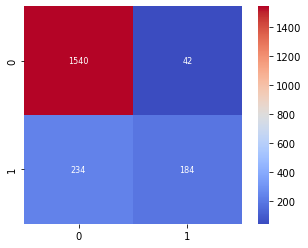

In [29]:
tn_fp_fn_tp = confusion_matrix(target_valid, forest.predict(features_valid), labels=[0,1])
sns.heatmap(tn_fp_fn_tp, annot=True, annot_kws={"size": 8}, fmt='.4g', square=True, cmap='coolwarm')

Заметим, что в данной модели 234 ложноотрицательных ответов, когда вместо 1 предсказан 0.

In [31]:
# точность
precision = precision_score(target_valid, forest.predict(features_valid), pos_label=1)
precision

0.8141592920353983

In [32]:
# полнота
recall = recall_score(target_valid, forest.predict(features_valid), pos_label=1)
recall

0.44019138755980863

In [34]:
f1 = f1_score(target_valid, forest.predict(features_valid), pos_label=1)
f1

0.5714285714285714

Итак, модель имеет точность выше 0,81, но полнота низкая. Вследствие этого *f1-мера* приняла значение 0,57. Модель требует доработки.

**Вывод**

Были рассмотрены три модели, каждой подобраны оптимальные параметры.
Таким образом, без учета дисбаланса лучше всей показала себя модель RandomForest:
- {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 120})

## Борьба с дисбалансом

Обратимся еще раз к распределению классов в модели:

In [35]:
class_frequency

0    0.7963
1    0.2037
Name: exited, dtype: float64

### Увеличение выборки

Для уменьшения дисбаланса, применим увеличение выборки:

In [56]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [58]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Обучим модели на новых данных:

In [59]:
logic_up = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
logic_up.fit(features_upsampled, target_upsampled)
l_score = logic_up.score(features_valid, target_valid)
print("Оценка наилучшей модели Логистической регрессии:", l_score)

Оценка наилучшей модели Логистической регрессии: 0.702


In [60]:
tree_model = DecisionTreeClassifier(random_state=12345)
params= {'criterion': ['gini', 'entropy'],
         'min_samples_split': [2,5,10],
         'max_depth': [5,9,12,15]}
tree_up = GridSearchCV(tree_model, params, cv=5)
tree_up.fit(features_upsampled, target_upsampled)
print("Наилучшая модель Pешающего дерева: %f имеет параметры %s" %(tree_up.best_score_, tree_up.best_params_))

Наилучшая модель Pешающего дерева: 0.891921 имеет параметры {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}


In [61]:
forest_model = RandomForestClassifier(random_state=12345)
param = { 'n_estimators': [60, 80, 100],
              'max_depth': [5,10,15],
              'min_samples_leaf': [2,4],
              'min_samples_split': [2,4]}
forest_up = GridSearchCV(forest_model, param, cv=5)
forest_up.fit(features_upsampled, target_upsampled)
print("Наилучшая модель Случайного леса: %f с параметрами %s" % (forest_up.best_score_, forest_up.best_params_))

Наилучшая модель Случайного леса: 0.916229 с параметрами {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


При увеличении выборки лучше всего показала себя модель Случайного леса *forest_up* с параметрами:
- {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [62]:
f1_up = f1_score(target_upsampled, forest_up.predict(features_upsampled), pos_label=1)
f1_up

0.991845196959226

In [63]:
up_probabilities_valid = forest_up.predict_proba(features_upsampled)

In [64]:
auc_roc_up = roc_auc_score(target_upsampled, up_probabilities_valid[:, 1])
auc_roc_up

0.9998687687796401

*f1_мера* достигла значения 0,98 при увеличении выборки, *auc_roc_up* приняла значение 0.999

### Уменьшение выборки

In [44]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_zeros = features_zeros.sample(frac = fraction, random_state=12345)
    target_zeros = target_zeros.sample(frac= fraction, random_state=12345)

    features_downsampled = pd.concat([features_zeros] + [features_ones])
    target_downsampled = pd.concat([target_zeros] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [45]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

На уменьшенной выборке обучим модель:

In [46]:
logic_down = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
logic_down.fit(features_downsampled, target_downsampled)
l_score = logic_down.score(features_valid, target_valid)
print("Оценка наилучшей модели Логистической регрессии:", l_score)

Оценка наилучшей модели Логистической регрессии: 0.7035


In [47]:
tree_model = DecisionTreeClassifier(random_state=12345)
params= {'criterion': ['gini', 'entropy'],
         'min_samples_split': [2,5,10],
         'max_depth': [5,9,12,15]}
tree_down = GridSearchCV(tree_model, params, cv=3)
tree_down.fit(features_downsampled, target_downsampled)
print("Наилучшая модель Pешающего дерева: %f имеет параметры %s" %(tree_down.best_score_, tree_down.best_params_))

Наилучшая модель Pешающего дерева: 0.787658 имеет параметры {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [48]:
forest_model = RandomForestClassifier(random_state=12345)
param = { 'n_estimators': [60, 80, 100],
              'max_depth': [5,10,15],
              'min_samples_leaf': [2,4],
              'min_samples_split': [2,4]}
forest_down = GridSearchCV(forest_model, param, cv=3)
forest_down.fit(features_downsampled, target_downsampled)
print("Наилучшая модель Случайного леса: %f с параметрами %s" % (forest_down.best_score_, forest_down.best_params_))

Наилучшая модель Случайного леса: 0.809617 с параметрами {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Итак, заметим что уменьшение и без того незначительного набора данных привело к тому, что лучшая модель *forest_down* Случайного леса имеет гиперпараметры:
- {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [49]:
f1_down = f1_score(target_downsampled, forest_down.predict(features_downsampled), pos_label=1)
f1_down

0.9407634927599824

In [50]:
down_probabilities_valid = forest_down.predict_proba(features_downsampled)

In [51]:
auc_roc_down = roc_auc_score(target_downsampled, down_probabilities_valid[:, 1])
auc_roc_down

0.997592585888571

In [52]:
(f1_up > f1_down) & (auc_roc_up > auc_roc_down)

True

Итак, при уменьшении выборки значения *f1* и *auc_roc* ухудшились. Поэтому, остановимся на способе увеличения выборки. Где лучшей оказалась модель forest_up.

## Тестирование модели

Протестируем модель *forest_up*, обученную в результате увеличения выборки:

In [65]:
predict_test = forest_up.predict(features_test)
probabilities_test = forest_up.predict_proba(features_test)

In [66]:
f1_test = f1_score(target_test, predict_test)
print("F1 наилучшей модели на тестовой выборке:", f1_test)

F1 наилучшей модели на тестовой выборке: 0.6155778894472361


In [67]:
auc_roc_test = roc_auc_score(target_test, probabilities_test[:, 1])
auc_roc_test

0.8536827414173304

Итак, при тестировании f1 достиг значения 0,61; auc_roc - 0,85.

**Вывод**
Для прогнозирования отока клиентов была решена задача бинарной классификации:

- на этапе исследования несбалансированных данных лучшая модель Случайного леса с параметрами
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 120}
  Здесь f1 = 0,57.
- на этапе балансирования данных выяснилось, что модели лучше реагируют на увеличение выборки. Лучше всех показала себя модель Случайного леса с параметрами 
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Здесь f1-мера достигла значения 0,98.
- при тестировании данной модели f1 достиг значения 0,61; auc_roc - 0,85.

Таким образом, модель далека от случайной, а значит пригодна для прогнозирования.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*